###  Created by Luis A. Sanchez-Perez (alejand@umich.edu).
<p><span style="color:green"><b>Copyright &#169;</b> Do not distribute or use without authorization from author.</span></p>

In [1]:
from sklearn import datasets
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
from training import *
from optimizers import *

### 1. Read a prepares dataset for training
In this section we read the dataset and binarize the problem, meaning we take all observations from one class as the positive observations and consider the rest negative observations.

In [2]:
# Load dataset
iris = datasets.load_iris()
print(iris.feature_names, end="\n")
print(iris.target_names)
# Binarize the problem
y = iris.target
y[y != 1] =  0
# Defines optimizer
optimizer = NewtonsMethodOptimizer()

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


### 2. One feature and linear boundary
In this section we select only one feature from the four available and try to fit a logistic regression model. We do not use any polynomial term so the result is a linear boundary. Clearly there is no perfect linear separatation between both classes based only on this feature.

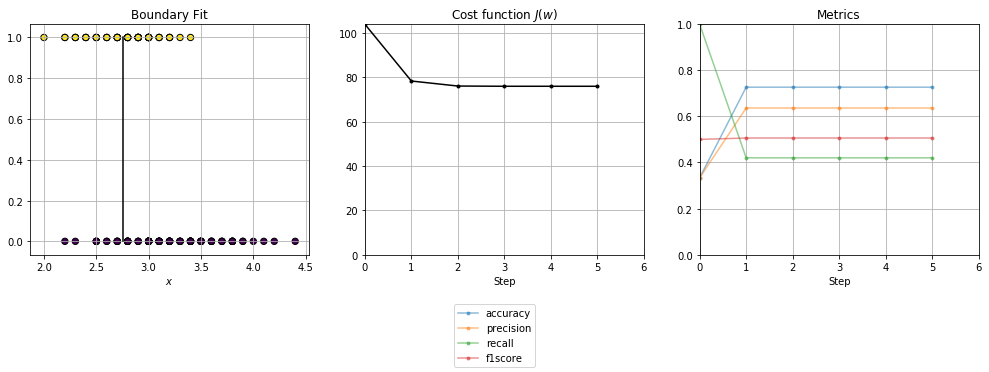

In [3]:
# Selects training data
features = [1]
X = iris.data[:, features]
# Applies transformations to the training data
ps = PolynomialFeatures(degree=1)
ps.fit(X)
X = ps.transform(X)
# Trains logistic regression model
point = 1e-4 * np.random.randn(2,)
log = train(X, y, point, optimizer, epochs=200)
# Shows training animation
TrainingAnimation1D(log, X, y).start()

### 3. Another feature and linear boundary
In this section we select another of the features and perform the same as in the previous section. As before, there is no perfect linear separatation between both classes based only on this feature.

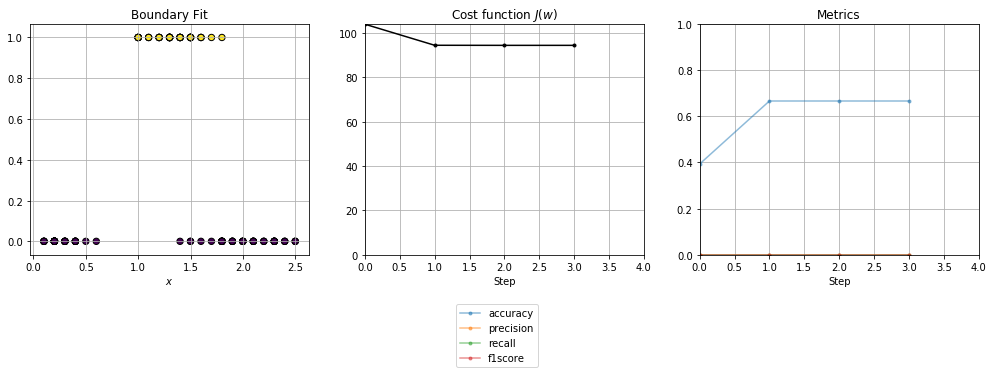

In [4]:
# Selects training data
features = [3]
X = iris.data[:,features]
# Applies transformations to the training data
ps = PolynomialFeatures(degree=1)
ps.fit(X)
X = ps.transform(X)
# Trains logistic regression model
point = 1e-4 * np.random.randn(2,)
log = train(X, y, point, optimizer, epochs=200)
# Showing training animation
TrainingAnimation1D(log, X, y).start()

### 4. Same feature but non-linear boundary
If you take a closer look at the graph from the previous boundary fit, you may notice that blue observations apparently lie in between 1 and 2, where as the red observations seem to fall anywhere outside this range. Is there a way to get a better boundary to capture this? What if we use a polynomial expansion adding the squared of the feature as well.

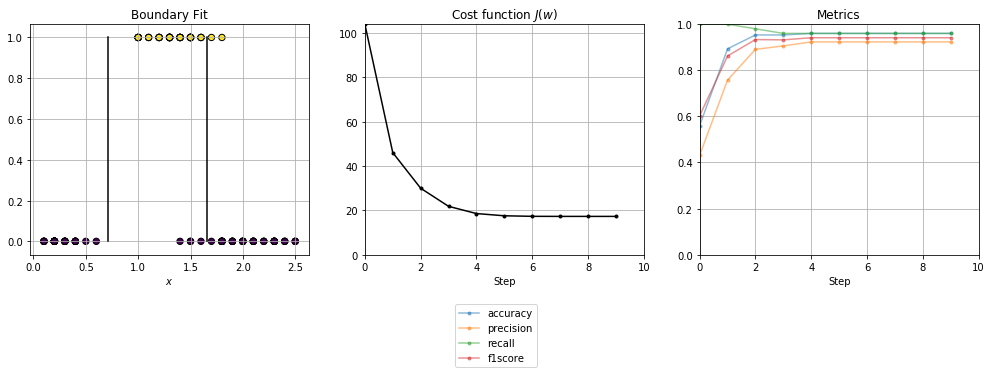

In [5]:
# Selects training data
features = [3]
X = iris.data[:,features]
# Applies transformations to the training data
ps = PolynomialFeatures(degree=2)
ps.fit(X)
X = ps.transform(X)
# Trains logistic regression model
point = 1e-4 * np.random.randn(3,)
log = train(X, y, point, optimizer, epochs=200)
# Showing training animation
TrainingAnimation1D(log, X, y).start()